# Used Car Sales on eBay Kleinanzeigen

In this project, I will be working with a dataset of used cars from [*eBay Kleinanzeigen*](https://www.ebay-kleinanzeigen.de/s-autos/c216), a classifieds section on the German eBay website. The main aim of this project is to clean the data, analyze the used car listings, and report any noteable trends.

Before I begin interacting with the data, I will import the numpy, pandas, and matplotlib libraries that are required for my analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. First Look at the Dataset

Next I will read in the *autos.csv* dataset. This dataset is "Latin-1" encoded rather than the default encoding, which is "UTF-8". In order to get a good feel for the data, I will print the first five lines in the autos dataset.

In [2]:
autos = pd.read_csv("autos.csv", encoding = "Latin-1")

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
len(autos)

371528

After taking a quick look at the dataset, the most pertinant columns for analysis are:
- seller = What's the difference between private and public sellers in relation to X?
- price = What factors affect the price of a car?
- yearOfRegistration = What affect does the age of the car have on factor X?
- kilometer = How does the number of kilometers driven affect factor X?

The info method used below gives information about the type of object in each column as well as how many objects each column has. Note that more columns have 371,528 values (which is the number of entries in the dataset) except for vehicleType, gearbox, model, fuelType, and note RepairedDamage, which all have a few missing values.

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

The names of these columns is in camelCase, which appears clunky and is more difficult to read than snake_case. I will rename all columns that are in camelCase with their snake_case equivalents.

In [6]:
autos = autos.rename(columns={"yearOfRegistration": "registration_year",
                             "monthOfRegistration": "registration_month",
                             "notRepairedDamage": "unrepaired_damage",
                             "dateCreated": "ad_created",
                             "vehicleType": "vehicle_type",
                             "offerType": "offer_type",
                             "powerPS": "power_PS",
                             "fuelType": "fuel_type",
                             "nrOfPictures": "nr_of_pictures",
                             "postalCode": "postal_code",
                             "lastSeen": "last_seen",
                             "dateCrawled": "date_crawled"})

In [7]:
autos.head(3)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


## 2. Examining Columns that Could Potentially Yield Useful Information

I will examine a few of the columns to see if they contain any noteable information. I will primarily take a look at the total number of possible values and the distribution of these values. Below I have created variables that represent each one of the rows in the dataset.

In [8]:
seller = autos["seller"]
price = autos["price"]
registration_year = autos["registration_year"]
kilometer = autos["kilometer"]

Taking a look at the shape of these columns will help me determine how many possible values are in each column, which can be used to determine how useful these columns are to analyze.

In [9]:
print("Seller Shape: " + str(seller.unique().shape))
print("Price Shape: " + str(price.unique().shape))
print("Registration Year Shape: " + str(registration_year.unique().shape))
print("Kilometer Shape: " + str(kilometer.unique().shape))

Seller Shape: (2,)
Price Shape: (5597,)
Registration Year Shape: (155,)
Kilometer Shape: (13,)


From the information above, it is fairly obvious that "seller" is a qualitative value (with two possible options) and "kilometer" is a quantitive value categorized into discrete bins. Also note that there are too many possible values for registration_year (cars have not even existed for 155 years), so I will have to limit the number of values in this column. 

### a) Seller and Kilometer Columns

Since both the seller and kilometer columns have a small number of possible values, I can use the value_counts method to analyze all possible values.

In [10]:
seller.value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [11]:
kilometer.value_counts()

150000    240797
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5676
10000       1949
Name: kilometer, dtype: int64

It looks like basically all of the values in the seller are privat, so this column will not be useful in my analysis. The distribution of the value in the kilometer column is much more useful, as nearly all the values are in the 150,000 km bin. Below I take a look at some statistical information regarding this column.

In [12]:
kilometer.describe()

count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

Since the 50th percentile and the maximum value are both 150,000, and the 25th percentile is 125,000, I can conclude that between 50% and 75% of the values in the kilometer column are 150,000. Almost all of the used cars on the German eBay site have a very high mileage.

### b) Price and Registration Year Columns

Because these columns contain a large amount of possible values, I won't be able to analyze these value by listing them using the value_counts method. However, I can still apply statistical methods to determine common ranges of values.

In [13]:
price.describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [14]:
registration_year.describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

There are clearly many issues with the data in the price and registration_year columns that will need to be amended.

The maximum value of the price column is over 2 billion dollars, while the mean value is significantly higher than the 75% quartile. To fix this, I will select a range of probably price values and set the dataset to only have data entries that are within that price range. I'm going to choose to select values between 100 and 500k, since people are not going to sell cars for less than 100 and no one is going to sell a used car for more than 500k. The data entries that lie outside of this range are either insincere offers or typos.

The registration_year has a minimum of 1000 and a maximum of 9999. This dataset is from 2016, so naturally that will be the maximum possible value. Since cars weren't manufactured until around 1920, I'm going to select that as my minimum range. There might be a few cars with years less than that, but they will be outliers and thus it won't affect my analysis.

### c) Frequency Distribution of Price

In [15]:
autos = autos[autos["price"].between(100, 500000)]

In [16]:
autos["price"].describe()

count    358108.000000
mean       5958.315134
std        9312.949853
min         100.000000
25%        1290.000000
50%        3100.000000
75%        7500.000000
max      500000.000000
Name: price, dtype: float64

<AxesSubplot:>

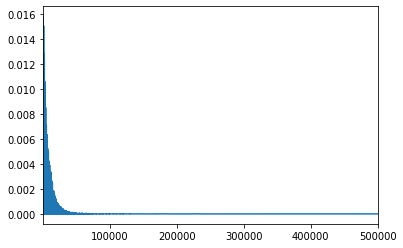

In [17]:
# Frequency Distribution of Price (100 - 500K)
autos["price"].value_counts(normalize=True).sort_index().plot()

<AxesSubplot:>

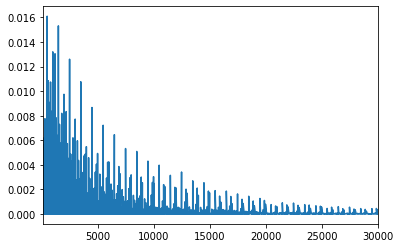

In [18]:
# Frequency Distribution of Price (100 - 30K)
autos[autos["price"].between(100, 30000)]["price"].value_counts(normalize=True).sort_index().plot()


The mean of the price column, which was over 10,000, has now decreased to being around 6,000, which is also less than the 75th percentile. This suggests that the cars priced at over 500k were greatly inflating the mean. Note that the distribution chart indicates that there are very few cars over 30k, so I have created a second chart that graphs the frequency of all cars sold at prices from 100 to 30k dollars. Note that the overall frequency decreases very rapidly as price increases starting from around 1000 dollars.

### d) Frequncy Distribution of Registration Year

In [19]:
autos = autos[autos["registration_year"].between(1920, 2016)]

In [20]:
autos["registration_year"].describe()

count    344198.000000
mean       2002.938222
std           7.119982
min        1923.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2016.000000
Name: registration_year, dtype: float64

<AxesSubplot:>

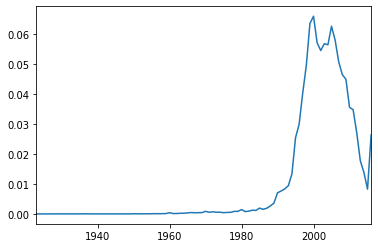

In [21]:
# Frequency Distribution of Registration Year (1920 - 2016) 
autos["registration_year"].value_counts(normalize=True).sort_index().plot()

<AxesSubplot:>

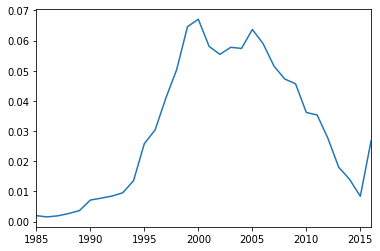

In [22]:
# Frequency Distribution of Registration Year (1920 - 2016) 
autos[autos["registration_year"].between(1985, 2016)]["registration_year"].value_counts(normalize=True).sort_index().plot()


Note that the mean registration year (2002) indicates that the vast majority of cars are younger than two decades old, which makes sense considering very few cars have a lifespan of older than a decade or two. Very few used cars were registered before 1985, so I created another frequency chart with indicating only registration years from 1985-2016. The frequency distribution increases very rapidly up to around the year 2000 and then starts to decrease very rapidly at around 2006, which roughly matches the 25% and 75% quartiles ranges of 1999 and 2008 respectively.

## 3. Analyzing the Top Brands Sold

Let's take a look at all of the different car brands sold on German eBay. First, let's take a look at the number of different brands as well as the frequency of each brand sold.

In [23]:
print(autos["brand"].unique().shape)
autos["brand"].value_counts(normalize=True) # normalize enables it to be percentage of total, rather than sum total

(40,)


volkswagen        0.211843
bmw               0.109945
opel              0.106177
mercedes_benz     0.097092
audi              0.089745
ford              0.068687
renault           0.047426
peugeot           0.030157
fiat              0.025674
seat              0.018690
skoda             0.015761
mazda             0.015418
smart             0.014373
citroen           0.013943
nissan            0.013606
toyota            0.012993
hyundai           0.010000
mini              0.009434
volvo             0.009166
sonstige_autos    0.009146
mitsubishi        0.008239
honda             0.007551
kia               0.006935
suzuki            0.006363
alfa_romeo        0.006290
porsche           0.006194
chevrolet         0.005041
chrysler          0.003850
dacia             0.002507
jeep              0.002194
land_rover        0.002182
daihatsu          0.002135
subaru            0.002098
jaguar            0.001729
saab              0.001467
daewoo            0.001453
trabant           0.001348
l

There are 40 different brands sold on German eBay, with volkswagen being the most popular brand by a large margin. However, it appears as though the majority of brands make up a very smaller percentage of the total number of cars sold, so I will only select the top car brands that make up a cummulative 95% of the total number of cars sold.

### a) Top Values Frequency Distribution

I want to calculate the top brands of cars that account for 95% of all cars sold on the German eBay site. In order to accomplish this, I will create a function that takes in a dataset and a column name in that dataset and will return the top variations of that  column until they account for X% of the total values in the dataset. The comment parameter will summarize the findings if set to True.

In [24]:
def top_values_for_column(dataset, column, percentage, comment=False):
    
    total_percentage = 0
    count = 0
    
    # orders the variations within the column by frequency
    for val in dataset[column].value_counts(normalize=True):
        if total_percentage < percentage / 100:  # adds values until they make up 95% of the total values in the dataset
            count += 1
            total_percentage += val
    if comment: # if comment is set to True, will summarize the data in a sentence
        print("The top " + str(count) + " " + str(column) + "s make up at least " + str(percentage) + "% of the total number of " + str(column) + "s in the dataset.")
    return dataset[column].value_counts(normalize=True).head(count)

top_values_for_column(autos, "brand", 95, True)


The top 23 brands make up at least 95% of the total number of brands in the dataset.


volkswagen        0.211843
bmw               0.109945
opel              0.106177
mercedes_benz     0.097092
audi              0.089745
ford              0.068687
renault           0.047426
peugeot           0.030157
fiat              0.025674
seat              0.018690
skoda             0.015761
mazda             0.015418
smart             0.014373
citroen           0.013943
nissan            0.013606
toyota            0.012993
hyundai           0.010000
mini              0.009434
volvo             0.009166
sonstige_autos    0.009146
mitsubishi        0.008239
honda             0.007551
kia               0.006935
Name: brand, dtype: float64

### b) Comparing Brand to Other Variables

Next, I want to find the average price and mileage of the top 23 brands sold that make up 95% of the total number of cars sold. The following function will use the top_values_for_column function to calculate the top variations of independent variable A until they accound for X% of the total number of cars sold in the dataset, and then will return the average of dependent variable B for each variation of variable A. If sort is set to true, the data will be sorted by the mean of the dependent variable. Otherwise it will remain sorted by the frequency of the independent variable. At the end, we will convert the dictionary or list of lists into a pandas dataframe so is is more readable.

In [25]:
def comparing_two_values(dataset, independent_var, dependent_var, percentage, sort=False):
    length = len(top_values_for_column(dataset, independent_var, percentage)) # number of values making up X% of data
    top_independent = dataset[independent_var].value_counts(normalize=True).index[:length] # list of values making up X% of data
    mean_X_per_Y_dict = {} # will return unsorted values if sort=False
    mean_X_per_Y = []
    mean_X_per_Y_sorted = [] # will return sorted values if sort=True
    
    for var in top_independent:
        X_vals = dataset[dataset[independent_var] == var] # creates a dataset of values in which independent variable = specific variation
        
        # calculates mean of dependent variable for each variation of independent variable
        if sort == True: 
            mean_X_per_Y.append([round(X_vals[dependent_var].mean(), 2), var]) # set to mean, independent var so it can be sorted
        else:
            mean_X_per_Y_dict[var] = round(X_vals[dependent_var].mean(), 2)
            
    if sort == True:
        
        mean_X_per_Y = sorted(mean_X_per_Y, reverse=True) # sorts values by dependent variable

        for value in mean_X_per_Y:
            mean_X_per_Y_sorted.append([value[1], value[0]]) # reverses order back to independent var, mean after sorting

        return pd.DataFrame.from_records(mean_X_per_Y_sorted, columns=[str(independent_var).capitalize(), str(dependent_var).capitalize()])
    
    else:
        return pd.DataFrame.from_dict(mean_X_per_Y_dict, orient='index', columns=[str(dependent_var).capitalize()])

For simplicity's sake, let's limit the number of top brands to those that consist of 75% of the total number of cars in the dataset. This should consist of much fewer brands and thus will be much easier to analyze.

In [26]:
top_values_for_column(autos, "brand", 75, True)

The top 8 brands make up at least 75% of the total number of brands in the dataset.


volkswagen       0.211843
bmw              0.109945
opel             0.106177
mercedes_benz    0.097092
audi             0.089745
ford             0.068687
renault          0.047426
peugeot          0.030157
Name: brand, dtype: float64

In [27]:
brand_prices = comparing_two_values(autos, "brand", "price", 75, True)
brand_kilometer = comparing_two_values(autos, "brand", "kilometer", 75, True)
combined = pd.merge(brand_prices, brand_kilometer, how='left')
combined

,Brand,Price,Kilometer
0,audi,9130.52,129555.52
1,mercedes_benz,8601.49,130729.38
2,bmw,8513.88,132988.27
3,volkswagen,5432.08,128505.40
4,ford,3734.84,123715.00
5,peugeot,3290.09,124498.07
6,opel,2999.34,128808.90
7,renault,2459.21,127915.95


As seen above, the most expensive three car brands are Audi, Mercedes Benz, and BMW. Ford, Peugeot, Opel, and Renault are lower-end cars, and Volkswagen appears to be somewhere in the middle. As for average kilometers on the odometer, all brands appear to have around the same average, which is between 123K and 133K.

## 4. Results

The majority of cars sold on the site have been driven 150k km driven or more, and the vast majority have been driven 125k km or more. It seems as though most sellers are selling their vehicles after a decent amount of time.

As the price of the car increases, the frequency of prices at which a car is sold decreases for price categories from around 1k to 500k. It is somewhat surprising that there are a lot of very low-end cars sold on the site as the average price range for the top seven brands was 2500-9000, but it's possible that the median car is much cheaper than the average.

50% of cars sold were registered between 1999 and 2008. Since cars generally have a life expectancy of 5-15 years (depending on maintenance and quality of the car) and eBay the site was likely commercially viable in the early 2000's, this is consistent with expectations.

Eight brands consist of 75% of total cars sold, while twenty-three brands consist of 95% of total cars sold. Volkswagon was by far the largest manufacturer and controlled over 21% of the total German car market. 

The eight main brands sold on the site vary significantly in price but they do not vary significantly in kilometers driven. Since the vast majority of cars have between 125-150km driven, this is consistent with the rest of the data.